# Water Quality Prediction

Water is used in our Day to Day activities and Drinking is one of the things we use Water for.

In this survey, we've written a Model that Predicts the Quality of Water using some values.
These values are <b style="color:red">pH, Hardness, Solids, Chrolamines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes and Turbidity</b>.
<h3>The following are the Expanation of these Parameters</h3>
<ul>
    <li>
        <b>pH: </b> pH, full meaning Pondos de Hydronium (Power of Hydrogen). pH is the Degree of Acidity or Alkanility of Water.
        The Range of pH goes from 0 - 14; pH of less than 7 indicates Acidity, greater than 7 denotes Alkalinity denotes Alkalinity and exactly 7 denotes Neutral.
    </li>
    <li>
        <b>Hardness: </b>Hard water is water that has high mineral content. Hardness of water simply means the amount of dissolved Calcium and magnesium in water.
    </li>
    <li>
        <b>Solids</b>
    </li>
    <li>
        <b>Chrolamines: </b>these are a group of chemical compounds that contain Chlorine and Ammonia
    </li>
    <li>
        <b>Sulfate: </b>Sulfate is a naturally occuring compound consisting of a single Sulfur ion and four Oxygen ions $SO_{4}^{-1}$
    </li>
    <li>
        <b> Conductivity: </b>this is a measure of the capability of water to pass electrical flow.
     </li>
    <li>
        <b>Organic Carbon: </b> this is a measure of total amount of Carbon in Organic Compounds in Pure water and aqeous systems.
    </li>
    <li>
        <b>Trihalomethanes: </b>are results of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water.
    </li>
    <li>
        <b>Turbidity: </b>This is caused by particles suspended in water that scatter light, making the water appear cloudy or Murky
    </li>
</ul>

## Data Preparation

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Load Dataset
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Get Useful Info's

In [3]:
print("Shape of Data>> ", df.shape)
print("Number of Rows>> ", df.shape[1])
print("Number of Columns>> ", df.shape[0])

Shape of Data>>  (3276, 10)
Number of Rows>>  10
Number of Columns>>  3276


In [4]:
print("Number of Null Values in each column>> \n",df.isnull().sum())

Number of Null Values in each column>> 
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
print("General Stats >>")
df.info()

General Stats >>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
print("Summary Stats>> ")
df.describe()

Summary Stats>> 


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
# Drop any row with atleast, 3 missing values
df = df[df.isnull().sum(axis = 1) < 3]
print("New number of rows>> ", df.shape[0])

New number of rows>>  3267


In [8]:
# Fill NaN values with mean of their column...
df.fillna(df.mean(), inplace=True)
print("Number of Null Values in each column>> \n",df.isnull().sum())

Number of Null Values in each column>> 
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [9]:
# Check new DataFrame
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Data Visualization

In [10]:
# See counts of Good and Bad water

df.Potability.value_counts()

0    1990
1    1277
Name: Potability, dtype: int64

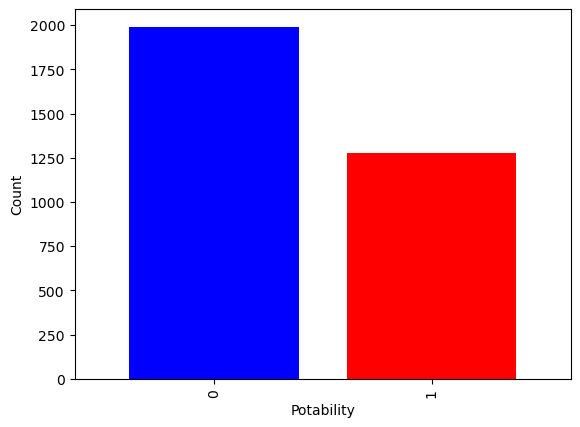

In [11]:
###

df.groupby("Potability").size().plot.bar(color=["blue", "red"], width=.78)
pt.xlabel("Potability")
pt.ylabel("Count")
pt.show()

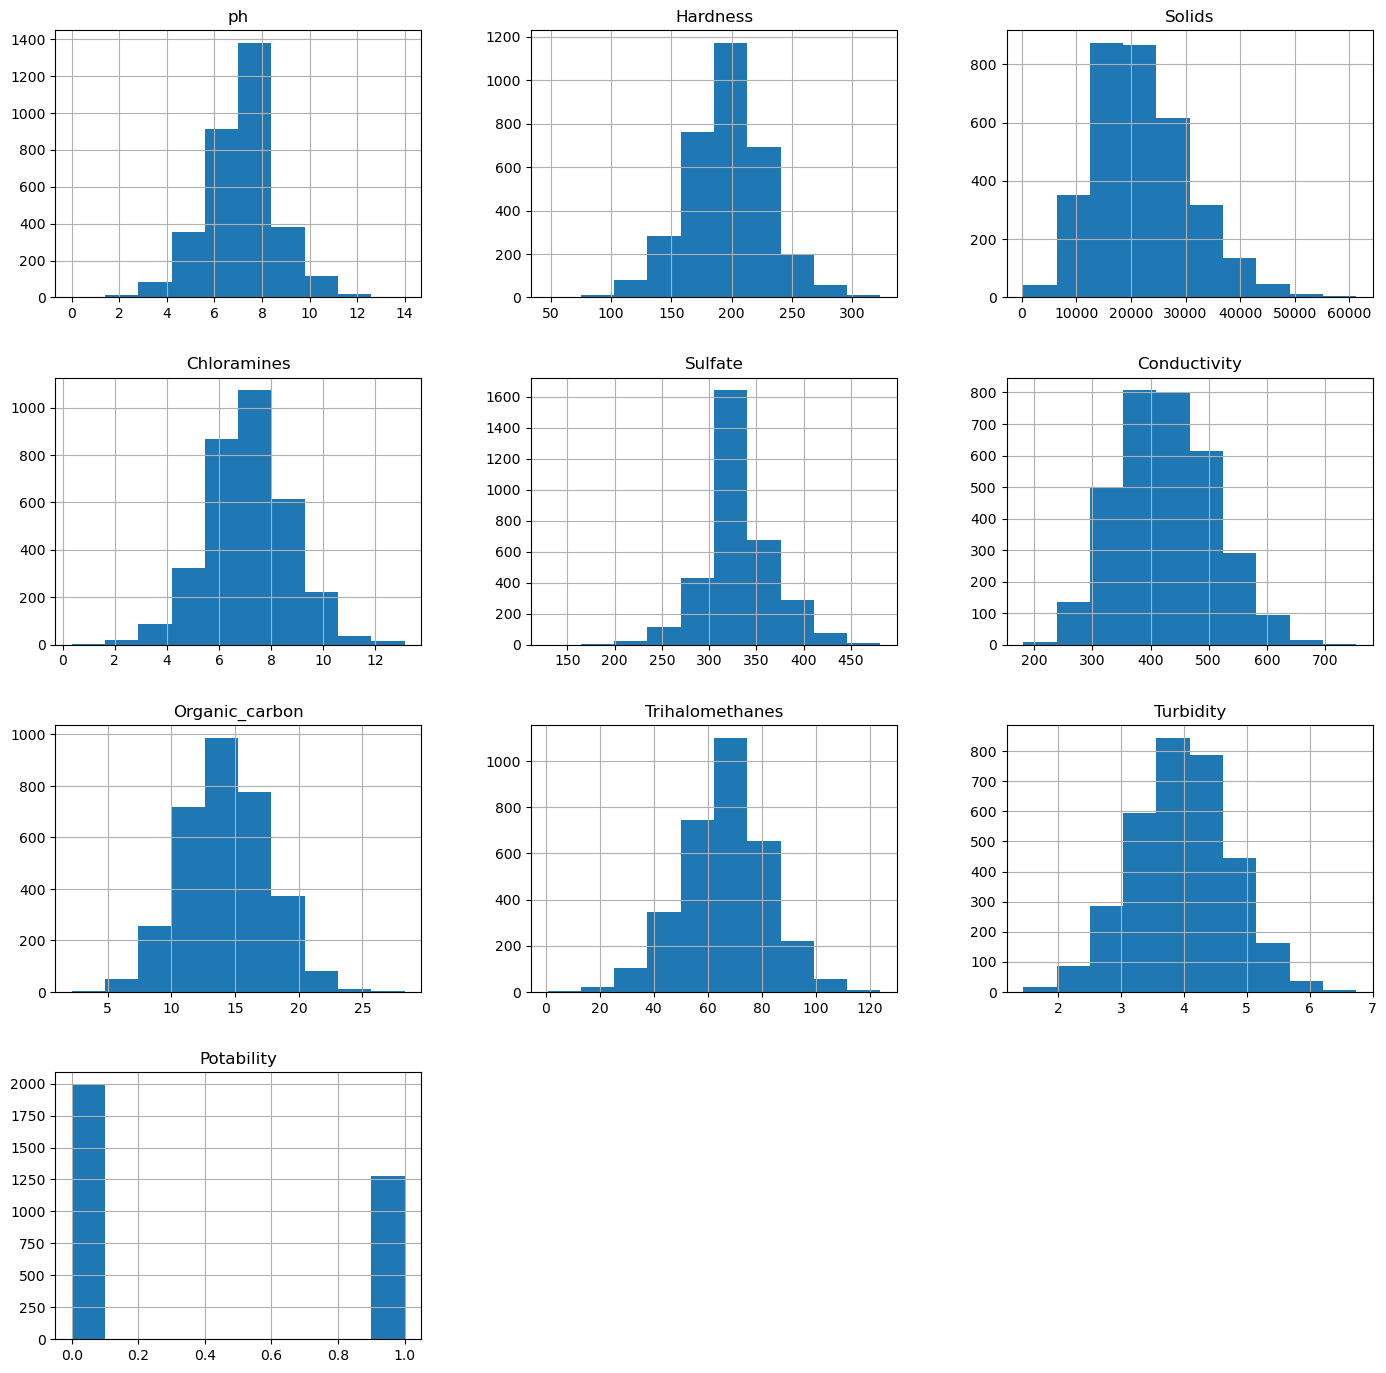

In [12]:
# See  visualizations of each columns 

df.hist(figsize=(17,17))
pt.show()

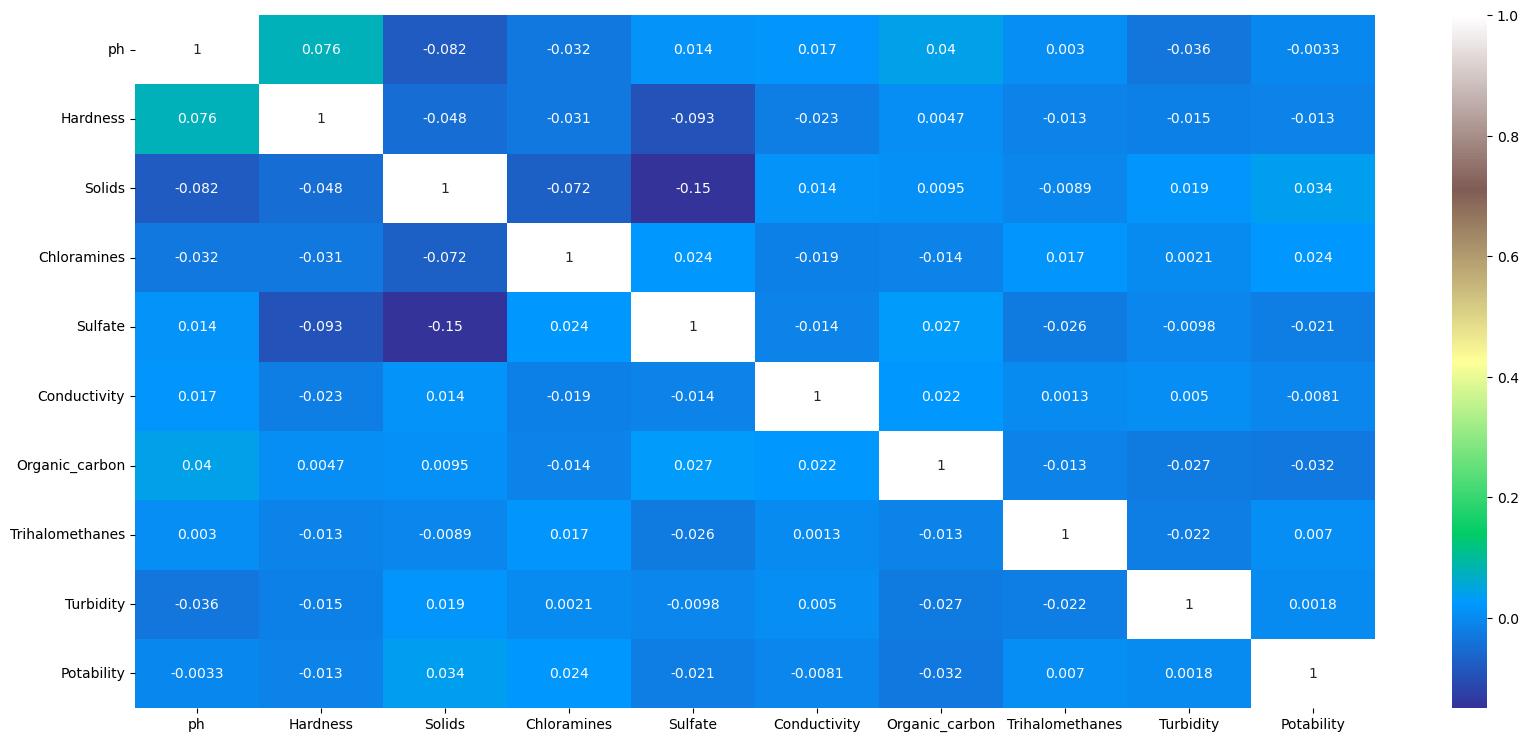

In [13]:
## Show Heatmap for Correlations 
pt.figure(figsize = (20, 9))
sns.heatmap(df.corr(), annot=True, cmap="terrain")
pt.show()

In [14]:
## Since there are no correlations in the Data, we won't reduce the values by Scaling

[]

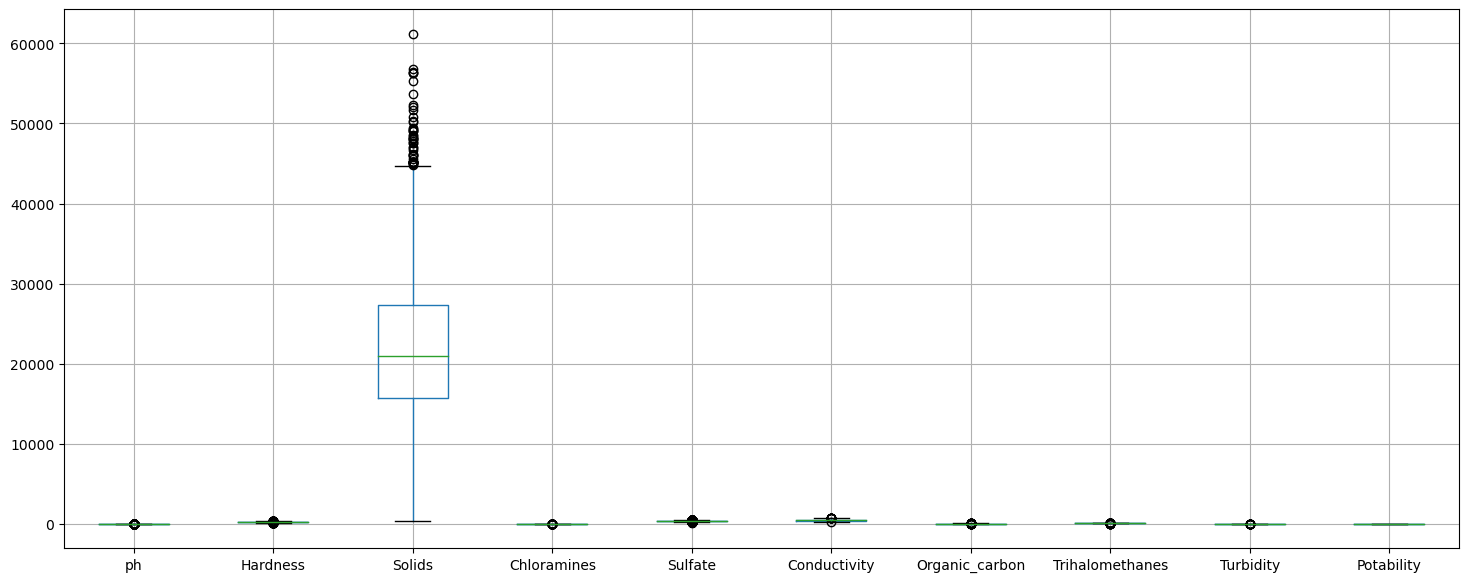

In [15]:
df.boxplot(figsize=(18, 7))
pt.plot()

## Modelling

In [16]:
# Set up DataFrames for Modelling
X = df.drop("Potability", axis = 1)
y = df["Potability"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, shuffle=True)

### Decision Tree Classifier

In [18]:
dtc = DecisionTreeClassifier(criterion ="gini", min_samples_split=10, splitter="best")
dtc.fit(X_train.values, y_train.values)
values = ["Water is Bad for Consumption", "Water is Good for Consumption"]

In [20]:
prediction_dtc = dtc.predict(X_test.values)

In [21]:
print("Accuracy Score>> ", accuracy_score(y_test, prediction_dtc)* 100)
print("Confusion Matrix>> \n", confusion_matrix(y_test, prediction_dtc))
print("Classification Report>>\n", classification_report(y_test, prediction_dtc))

Accuracy Score>>  63.1578947368421
Confusion Matrix>> 
 [[355 152]
 [149 161]]
Classification Report>>
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       507
           1       0.51      0.52      0.52       310

    accuracy                           0.63       817
   macro avg       0.61      0.61      0.61       817
weighted avg       0.63      0.63      0.63       817



In [22]:
print("ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity", "\n")

new_data_dtc = [[2.50987, 7.9870, 2.782, 0.56765, 90.9876, 8.27382, 2.4, 2.5, 0]]
predict_new_data_dtc = dtc.predict(new_data_dtc)

print(new_data_dtc)
print(predict_new_data_dtc,values[predict_new_data_dtc[0]])

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity 

[[2.50987, 7.987, 2.782, 0.56765, 90.9876, 8.27382, 2.4, 2.5, 0]]
[1] Water is Good for Consumption


## Logistic Regression

In [23]:
lm = linear_model.LogisticRegression()

In [24]:
lm.fit(X_train.values, y_train.values)
prediction_lm = lm.predict(X_test.values)

In [25]:
print("Accuracy Score>> ", accuracy_score(y_test, prediction_lm)* 100)
print("Confusion Matrix>> \n", confusion_matrix(y_test, prediction_lm))
#print("Classification Report>>\n", classification_report(y_test, prediction_lm))

Accuracy Score>>  62.0563035495716
Confusion Matrix>> 
 [[507   0]
 [310   0]]


In [26]:
print("ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity", "\n")

new_data_lm = [[2.50987, 7.9870, 2.782, 0.56765, 90.9876, 8.27382, 2.4, 2.5, 0]]
predict_new_data_lm = dtc.predict(new_data_lm)

print(new_data_lm)
print(predict_new_data_lm,values[predict_new_data_lm[0]])

lm.predict([[9.092223, 181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075]])

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity 

[[2.50987, 7.987, 2.782, 0.56765, 90.9876, 8.27382, 2.4, 2.5, 0]]
[1] Water is Good for Consumption


array([0], dtype=int64)